In [86]:
#Import the packages
import nltk
import nltk.corpus
import pickle
import re
import pandas as pd
import numpy as np

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
nltk.download("stopwords") #Import stopwords and punctuation from NLTK
from string import punctuation
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelanazarian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data and form corpora

In [87]:
trump_corpus = nltk.corpus.PlaintextCorpusReader('/Users/angelanazarian/NLTK_Final_Project/Clinton-Trump-Corpus/Trump/','Trump_.*.txt')

In [88]:
clinton_corpus = nltk.corpus.PlaintextCorpusReader('/Users/angelanazarian/NLTK_Final_Project/Clinton-Trump-Corpus/Clinton/','Clinton_.*.txt')

In [89]:
trump_raw = trump_corpus.raw()
trump_words = trump_corpus.words()
trump_text = nltk.Text(trump_words)

clinton_raw = clinton_corpus.raw()
clinton_words = clinton_corpus.words()
clinton_text = nltk.Text(clinton_words)

## Clean up the data
Get rid of applause, stop words, anything between < >, punctuation " -- . , '
Write a for loop to clean up all the data 



In [104]:
#this is a function that filters out the stopwords, punctuation, and audience directions in a given corpus

def clean_up_data(x):
    filtered_for_punctuation = x
    filtered_for_punctuation = re.sub("[\(\<].*[\)\>]", "", filtered_for_punctuation) #remove audience directions
    for punc in punctuation:
        filtered_for_punctuation = filtered_for_punctuation.replace(punc, "") #remove punctuation
    filtered_for_punctuation = nltk.wordpunct_tokenize(filtered_for_punctuation) #tokenize text
    filtered_for_punctuation = [word for word in filtered_for_punctuation if word.lower() not in stopwords.words('english')] #remove stopwords
        #note that stopwords include words like very and against 
    #filtered_for_punctuation = str(filtered_for_punctuation)
    filtered_for_punctuation = filtered_for_punctuation.lower() #convert all words to lowercase
    return filtered_for_punctuation

In [91]:
#load ANEW sentiment dictionary
anew_df = pd.read_csv('https://github.com/peachypunk/NLTK_Final_Project/raw/master/ANEW2010_CSV.csv')
anew_df.head()

,Word,Wdnum,ValMn,ValSD,AroMn,AroSD,DomMn,DomSD
0,abduction,621,2.76,2.06,5.53,2.43,3.49,2.38
1,able,1041,6.74,2.00,4.30,2.17,6.83,2.04
2,abortion,622,3.50,2.30,5.39,2.80,4.59,2.54
3,absent,1042,3.69,1.72,4.73,1.76,4.35,1.87
4,absurd,623,4.26,1.82,4.36,2.20,4.73,1.72


In [105]:
#clean up both corpora using the custom function from above
clean_trump = clean_up_data(trump_raw)
clean_clinton = clean_up_data(clinton_raw)

#join the corpora together while keeping them as separate entities as part of one 
#larger corpus umbrella
collected_corpora_df = {'clean_clinton' : clean_clinton, 'clean_trump' : clean_trump}
pd.Series(collected_corpora_df)

#take the "Word" column from the anew_df and convert it into a list called "wordlist"
wordlist = anew_df["Word"].tolist()

#initialize an empty array for the summed word counts for each w in wordlist
#these will be summed across all corpora in the larger corpus as well
wordfreq_corpus = [] 

#make an empty matrix that's the size of the ANEX words and two corpora 
matrix = np.zeros((len(collected_corpora_df), len(wordlist)))
for i, cid in enumerate(collected_corpora_df): #for each corpus in the list of corpora
    this_corpus_words = collected_corpora_df[(cid)]
    for j, w in enumerate(wordlist): #for each word in the ANEW wordlist...
        count = this_corpus_words.count(w) #count how many times each word (w) occurs in the wordlist for each corpus
        matrix[i,j] = count
        
df = pd.DataFrame(matrix)
df.columns = wordlist
df.index = collected_corpora_df.keys()
#print(df)

#optional: print the output to a csv file. just change the "path_or_buf" part to be where you
#want to save the file
#df.to_csv(path_or_buf='/Users/angelanazarian/nltk_output.csv', sep=',', header=True, index=True, line_terminator='\n')



AttributeError: 'list' object has no attribute 'lower'

## Calculating emotional charge

We want to multiply each item in the df columns by their corresponding mean valence (ValMn), 
mean arousal (AroMn), and mean dominance (DomMn) scores from the anew_df. In essence, these scores serve as weights.

In [67]:
df_wide = df.copy() #make a copy of df and calling it "df_wide"
df_long = df_wide.transpose() #transpose "df_wide" into "df_long" format
df_long.reset_index(level=0, inplace=True) #converting the ANEW word indices into numeric indices
df_long.columns = ['Word', 'clinton_WC', 'trump_WC'] #renaming columns (WC = word count)
df_long

,Word,clinton_WC,trump_WC
0,abduction,0.0,0.0
1,able,21.0,57.0
2,abortion,0.0,0.0
3,absent,0.0,0.0
4,absurd,1.0,0.0
5,abundance,0.0,0.0
6,abuse,1.0,0.0
7,accept,2.0,4.0
8,acceptance,1.0,1.0
9,access,2.0,7.0


In [68]:
anew_sliced = anew_df[['Word','ValMn', 'AroMn', 'DomMn']] 
anew_sliced #subsetting the mean ratings from ANEW df

,Word,ValMn,AroMn,DomMn
0,abduction,2.76,5.53,3.49
1,able,6.74,4.30,6.83
2,abortion,3.50,5.39,4.59
3,absent,3.69,4.73,4.35
4,absurd,4.26,4.36,4.73
5,abundance,6.59,5.51,5.80
6,abuse,1.80,6.83,3.69
7,accept,6.80,5.53,5.41
8,acceptance,7.98,5.40,6.64
9,access,6.14,5.07,6.25


In [69]:
df_combined = pd.merge(df_long, anew_sliced)
df_combined #combining df_long with anew_sliced into one dataframe

,Word,clinton_WC,trump_WC,ValMn,AroMn,DomMn
0,abduction,0.0,0.0,2.76,5.53,3.49
1,able,21.0,57.0,6.74,4.30,6.83
2,abortion,0.0,0.0,3.50,5.39,4.59
3,absent,0.0,0.0,3.69,4.73,4.35
4,absurd,1.0,0.0,4.26,4.36,4.73
5,abundance,0.0,0.0,6.59,5.51,5.80
6,abuse,1.0,0.0,1.80,6.83,3.69
7,accept,2.0,4.0,6.80,5.53,5.41
8,acceptance,1.0,1.0,7.98,5.40,6.64
9,access,2.0,7.0,6.14,5.07,6.25


In [70]:
# WORD COUNTS x VALENCE MEANS:

# "clinton_Val" = clinton_WC x ValMn
df_combined['clinton_Val'] = df_combined.apply(lambda row: (row['clinton_WC']*row['ValMn']), axis=1)

# "trump_Val" = trump_WC x ValMn
df_combined['trump_Val'] = df_combined.apply(lambda row: (row['trump_WC']*row['ValMn']), axis=1)



# WORD COUNTS x AROUSAL MEANS:

# "clinton_Aro" = clinton_WC x AroMn
df_combined['clinton_Aro'] = df_combined.apply(lambda row: (row['clinton_WC']*row['AroMn']), axis=1)

# "trump_Aro" = trump_WC x AroMn
df_combined['trump_Aro'] = df_combined.apply(lambda row: (row['trump_WC']*row['AroMn']), axis=1)



# WORD COUNTS x DOMINANCE MEANS:

# "clinton_Dom" = clinton_WC x DomMn
df_combined['clinton_Dom'] = df_combined.apply(lambda row: (row['clinton_WC']*row['DomMn']), axis=1)

# "trump_Val" = trump_WC x ValMn
df_combined['trump_Dom'] = df_combined.apply(lambda row: (row['trump_WC']*row['DomMn']), axis=1)



df_combined

,Word,clinton_WC,trump_WC,ValMn,AroMn,DomMn,clinton_Val,trump_Val,clinton_Aro,trump_Aro,clinton_Dom,trump_Dom
0,abduction,0.0,0.0,2.76,5.53,3.49,0.00,0.00,0.00,0.00,0.00,0.00
1,able,21.0,57.0,6.74,4.30,6.83,141.54,384.18,90.30,245.10,143.43,389.31
2,abortion,0.0,0.0,3.50,5.39,4.59,0.00,0.00,0.00,0.00,0.00,0.00
3,absent,0.0,0.0,3.69,4.73,4.35,0.00,0.00,0.00,0.00,0.00,0.00
4,absurd,1.0,0.0,4.26,4.36,4.73,4.26,0.00,4.36,0.00,4.73,0.00
5,abundance,0.0,0.0,6.59,5.51,5.80,0.00,0.00,0.00,0.00,0.00,0.00
6,abuse,1.0,0.0,1.80,6.83,3.69,1.80,0.00,6.83,0.00,3.69,0.00
7,accept,2.0,4.0,6.80,5.53,5.41,13.60,27.20,11.06,22.12,10.82,21.64
8,acceptance,1.0,1.0,7.98,5.40,6.64,7.98,7.98,5.40,5.40,6.64,6.64
9,access,2.0,7.0,6.14,5.07,6.25,12.28,42.98,10.14,35.49,12.50,43.75


In [71]:
#Sum of all values in "clinton_Val" column (summing across all words)
SUM_clinton_Val = df_combined['clinton_Val'].values.sum() 

SUM_clinton_Val

31152.200000000001

In [72]:
#Sum of all values in "trump_Val" column (summing across all words)
SUM_trump_Val = df_combined['trump_Val'].values.sum()

SUM_trump_Val

89329.540000000008

In [73]:
#Sum of all values in "clinton_Aro" column (summing across all words)
SUM_clinton_Aro = df_combined['clinton_Aro'].values.sum() 

SUM_clinton_Aro

27309.540000000001

In [74]:
#Sum of all values in "trump_Aro" column (summing across all words)
SUM_trump_Aro = df_combined['trump_Aro'].values.sum() 

SUM_trump_Aro

79172.510000000009

In [75]:
#Sum of all values in "clinton_Dom" column (summing across all words)
SUM_clinton_Dom = df_combined['clinton_Dom'].values.sum() 

SUM_clinton_Dom

29476.309999999998

In [76]:
#Sum of all values in "trump_Dom" column (summing across all words)
SUM_trump_Dom = df_combined['trump_Dom'].values.sum() 

SUM_trump_Dom

84429.429999999993

## Plotting the results

In [79]:
#nene is creating code to join all the values together in a for loop
#but for this plotting exercise I just cheated and combined them together
data = pd.read_csv('/Users/angelanazarian/Desktop/candidate_values.csv')
data

,Candidate,Sum_dominance,Sum_arousal,Sum_valence
0,Trump,84429.43,79172.51,89329.54
1,Clinton,29476.31,27309.54,31152.20


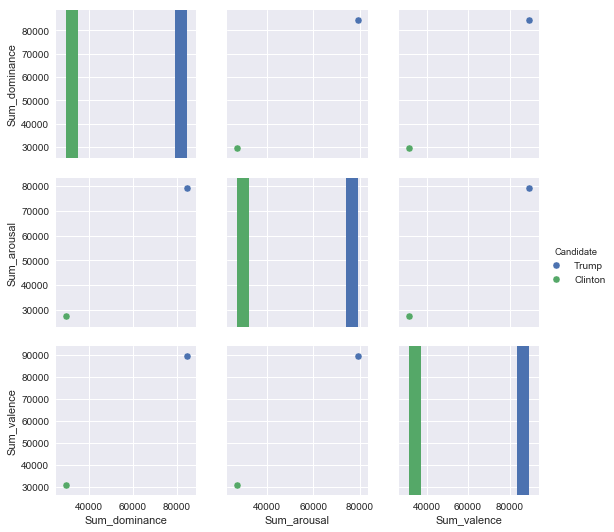

In [82]:
import seaborn as sns

%matplotlib inline
sns.pairplot(data, hue = 'Candidate')




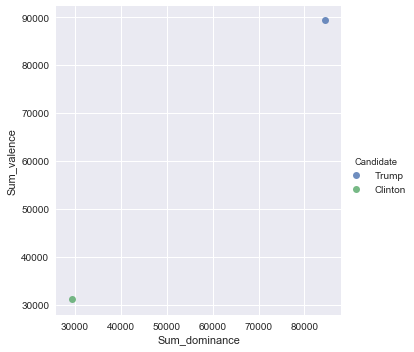

In [83]:
sns.lmplot('Sum_dominance', 'Sum_valence', data, hue = 'Candidate', fit_reg=False)

## Most frequent words for each candidate

In [143]:
# Calculate frequency distribution
clinton_fdist = nltk.FreqDist(clean_clinton)
top20clinton = pd.DataFrame(clinton_fdist.most_common(20))
top20clinton.columns = ['Word', 'frequency']

trump_fdist = nltk.FreqDist(clean_trump)
trump_fdist.most_common(20)
top20trump = pd.DataFrame(trump_fdist.most_common(20))
top20trump.columns = ['Word', 'frequency']

In [144]:
#top 20 words for both candidates in one dataframe
top20words = pd.merge(top20trump, top20clinton, on='Word', how='outer')
top20words.columns = ['Word', 'frequency_trump', 'frequency_clinton']


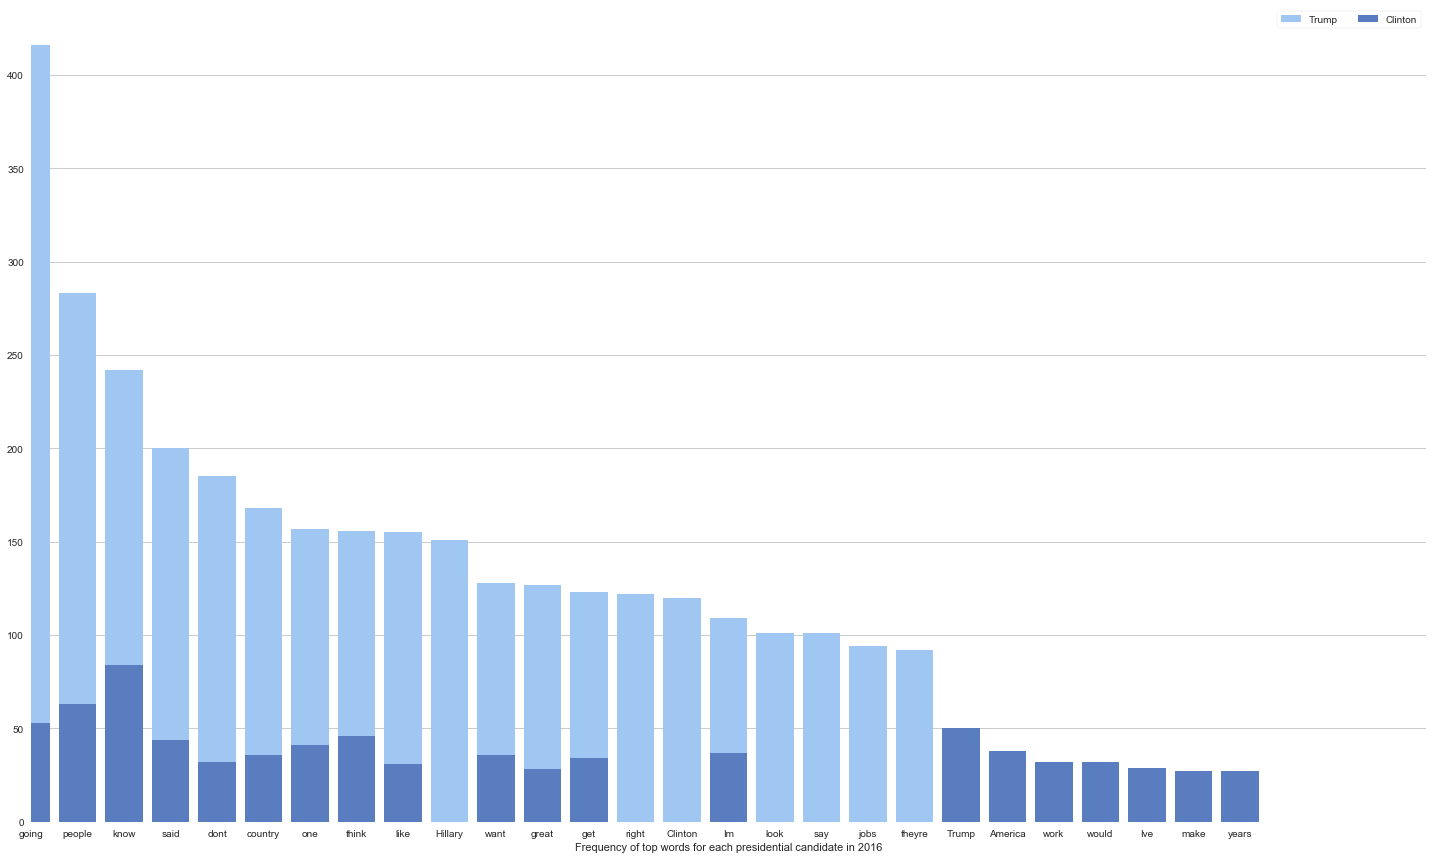

In [177]:
#plot top words for both candidates to see how much each person used those words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Load the example car crash dataset

# Plot the top word frequency for Trump
sns.set_color_codes("pastel")
sns.barplot(x="Word", y="frequency_trump", data=top20words,
            label="Trump", color="b")

#Plot the top word frequency for Clinton
sns.set_color_codes("muted")
sns.barplot(x="Word", y="frequency_clinton", data=top20words,
            label="Clinton", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 30), ylabel="",
       xlabel="Frequency of top words for each presidential candidate in 2016")
sns.despine(left=True, bottom=True)
    

## Top words used by each candidate (along with visuals for valence of those words)

In [224]:
#this is a graph of the most frequently used words for each candidate and how many times each used it

#you can hover over the nodes to display the actual words
#it's actually kind of interesting to see the words that were exclusive to each of them (seen on the actual axes)
#for instance, although Trump was all about boosting employment, it's Hillary who used the word "work" the most
#Trump's uniquely most frequent word was "right"
import plotly.plotly as py
import plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='peachypunk', api_key='zl14cGCYwyddRaQklh90')


data = [
    go.Scatter(
        x= top20valence.frequency_trump,
        y=top20valence.frequency_clinton,
        mode='markers',
        text=top20valence.Word
    )
]
layout = go.Layout(
    title='Words Most Frequently Used By Each Candidate',
    xaxis = dict(
        title='Trump Frequency'),
    yaxis = dict(
        title= 'Clinton Frequency'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [225]:
#this is an even cooler version of the above which incorporates valence of each word by coloring the nodes
#like heat maps. this graph is my magnum opus
import plotly.plotly as py
import plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='peachypunk', api_key='zl14cGCYwyddRaQklh90')


data = [
    go.Scatter(
        x= top20valence.frequency_trump,
        y=top20valence.frequency_clinton,
        mode='markers',
        marker=dict(
        size='16',
        color = top20valence.ValMn, #set color equal to a variable
        colorscale='YlOrRd',
        showscale=True
    ),
        text=top20valence.Word
    )
]
layout = go.Layout(
    title='Words Most Frequently Used By Each Candidate',
    xaxis = dict(
        title='Trump Frequency'),
    yaxis = dict(
        title= 'Clinton Frequency'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

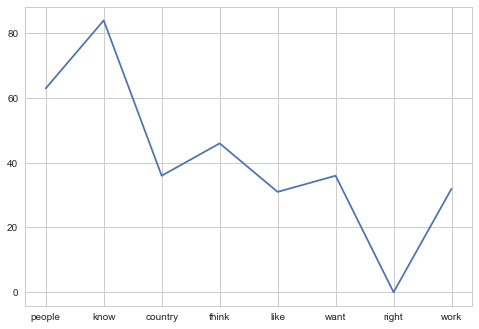

In [180]:
#I think this looks more boring, but it's another option
import matplotlib.pyplot as pl
plt.plot(top20valence.frequency_clinton)
plt.xticks(range(len(top20valence.Word)), top20valence.Word)
plt.show()

## Lexical Factors

In [232]:
#calculate a measure of the lexical richness or lexical diversity of the text 
#this measure reflects the number of distinct words
print(len(set(clean_clinton)) / len(clean_clinton))
print(len(set(clean_trump)) / len(clean_trump))


0.36607984910405533
0.17098989128361625


In [246]:
#count how often a word occurs in a text, and compute what percentage of the text is taken 
#up by a specific word. 
#we can do this for social media words (i.e. Facebook, tweet, Twitter, social media, online)

from collections import Counter
social_media_counts = Counter()
words = ('facebook', 'tweet', 'twitter', 'social media', 'online', 'email', 'emails')
for word in words:
    if word in clean_clinton:
        social_media_counts[word] += 1
print (social_media_counts)

#if you want to compute the percentage of text that uses these words, start here: 
#100 * social_media_clinton / len(clean_clinton)


Counter({'tweet': 1, 'online': 1, 'email': 1, 'emails': 1})


In [247]:
for word in words:
    if word in clean_trump:
        social_media_counts[word] += 1
print (social_media_counts)



Counter({'email': 2, 'emails': 2, 'tweet': 1, 'online': 1})
